In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 2.1 MB/s eta 0:00:20
   - -------------------------------------- 1.0/40.2 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.6/40.2 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.1/40.2 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/40.2 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.4/40.2 MB 2.5 MB/s eta 0:00:15
   --- ------------------------------------ 3.9/40.2 MB 2.5 MB/s eta 0:00:15
   ---- ----------------------------------- 5.0/40.2 MB 2.8 MB/s eta 0:00:13
   ----- ---------------------------------- 6.0/40.2 MB 3.0 MB/s eta 0:00:12
   ------- -------------------------------- 7.1/40.2 MB 3.2 MB/s eta 0:00:11
   -------- ------------------------------- 8.1/40.2 MB 3.4 MB/s eta 0:00:10
   ---------

In [2]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [4]:
data=r"C:\Users\chinm\Downloads\forest_fire-20260130T082050Z-3-001\forest_fire\Testing"

In [6]:
x1,y1=[],[]
for i in os.listdir(data):
    new_dir=os.path.join(data,i)
    if os.path.isdir(new_dir):
        for j in os.listdir(new_dir):
            image_path=os.path.join(new_dir,j)
            if image_path.endswith((".png",".jpg",".jpeg")):
                image_data=cv2.imread(image_path)
                array_resize=cv2.resize(image_data,(100,100))
                array_reshape=array_resize.reshape(100,100,3)
                array_norm=array_reshape/255
                x1.append(array_norm)
                y1.append(i)
x1=np.array(x1)
y1=np.array(y1)
print(x1.shape)
print(y1.shape)
                
            

(68, 100, 100, 3)
(68,)


In [7]:
data1=r"E:\CNN_DATASET\forest_fire-20260130T082050Z-3-001\forest_fire\Training and Validation"

In [8]:
x2,y2=[],[]
for i in os.listdir(data1):
    new_dir=os.path.join(data1,i)
    if os.path.isdir(new_dir):
        for j in os.listdir(new_dir):
            image_path=os.path.join(new_dir,j)
            if image_path.endswith((".png",".jpg",".jpeg")):
                image_data=cv2.imread(image_path)
                array_resize=cv2.resize(image_data,(100,100))
                array_reshape=array_resize.reshape(100,100,3)
                array_norm=array_reshape/255
                x2.append(array_norm)
                y2.append(i)
x2=np.array(x2)
y2=np.array(y2)
print(x2.shape)
print(y2.shape)


(1912, 100, 100, 3)
(1912,)


In [9]:
x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
y

array(['fire', 'fire', 'fire', ..., 'nofire', 'nofire', 'nofire'],
      dtype='<U6')

In [10]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

1584 1584
396 396


In [ ]:
#model=load_model("fire_video.h5")

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2,activation="softmax"))
          
          

C:\Users\chinm\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [16]:
model.fit(xtrain,ytrain,batch_size=10,epochs=22,validation_data=(xtest,ytest))

Epoch 1/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 49s 280ms/step - accuracy: 0.8883 - loss: 0.3021 - val_accuracy: 0.9268 - val_loss: 0.1708
Epoch 2/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 82s 282ms/step - accuracy: 0.9451 - loss: 0.1726 - val_accuracy: 0.9091 - val_loss: 0.2444
Epoch 3/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.9369 - loss: 0.1893 - val_accuracy: 0.9520 - val_loss: 0.1184
Epoch 4/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - accuracy: 0.9514 - loss: 0.1355 - val_accuracy: 0.9697 - val_loss: 0.1191
Epoch 5/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 33s 205ms/step - accuracy: 0.9646 - loss: 0.1127 - val_accuracy: 0.9621 - val_loss: 0.0876
Epoch 6/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - accuracy: 0.9621 - loss: 0.1147 - val_accuracy: 0.9697 - val_loss: 0.0926
Epoch 7/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step - accuracy: 0.9691 - loss: 0.0836 - val_accuracy: 0.9596 - val_loss: 0.1146
Epoch 8/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9823 - loss: 0

In [17]:
test_data1=r"E:\CNN_DATASET\forest_fire-20260130T082050Z-3-001\forest_fire\Training and Validation\fire\abc005.jpg"

In [18]:
image_data=cv2.imread(test_data1)
array_resize=cv2.resize(image_data,(100,100))
array_reshape=array_resize.reshape(1,100,100,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 100, 100, 3)


In [19]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


array([[1.000000e+00, 4.016012e-15]], dtype=float32)

In [20]:
label=["fire","nofire"]

In [21]:
b=np.argmax(a)  #argmax give index of largest value
label[b]

'fire'

In [22]:
test_data2=r"C:\Users\chinm\Downloads\forest_fire-20260130T082050Z-3-001\forest_fire\Testing\nofire\abc336.jpg"

In [23]:
image_data=cv2.imread(test_data2)
array_resize=cv2.resize(image_data,(100,100))
array_reshape=array_resize.reshape(1,100,100,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 100, 100, 3)


In [25]:
c=model.predict(array_norm)
c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[2.4931949e-06, 9.9999750e-01]], dtype=float32)

In [26]:
d=np.argmax(c)
label[d]

'nofire'

In [34]:
ypred=model.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


In [35]:
ypredd=[]
for i in ypred:
    ypredd.append(np.argmax(i))
    

In [36]:
cm=confusion_matrix(ytest,ypredd)
cm

array([[192,   5],
       [  4, 195]])

<Axes: >

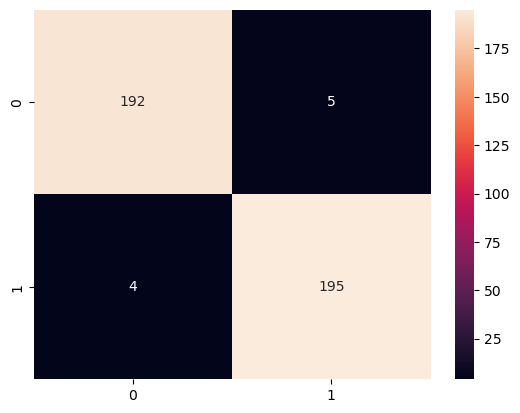

In [38]:
sns.heatmap(cm,fmt="d",annot=True)